In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("M1_final.csv")

In [4]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [5]:
df.shape

(28820, 23)

##Level encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [61]:
df_label_encoded= df
df_one_encoded =df

In [26]:
df_label_encoded["OP_UNIQUE_CARRIER"]= le.fit_transform(df["OP_UNIQUE_CARRIER"])
df_label_encoded["TAIL_NUM"] =le.fit_transform(df["TAIL_NUM"] )
df_label_encoded["DEST"] =le.fit_transform(df["DEST"] )
df_label_encoded["Wind"] =le.fit_transform(df["Wind"] )
df_label_encoded["Condition"] =le.fit_transform(df["Condition"] )

In [27]:
df_label_encoded.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Temperature,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,...,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,2.828348,1024.922415,31.019362,6.374983,225.288203,1267.746079,831.003851,...,41.489833,57.732616,9.577793,12.367627,5.535323,30.092433,10.371131,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,1.865362,656.024238,18.726958,38.735144,119.482417,889.343246,299.398525,...,8.043533,23.468676,5.101199,6.259298,11.886457,0.296160,7.273523,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-22.000000,57.000000,94.000000,301.000000,...,17.000000,0.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,1.000000,403.000000,15.000000,-6.000000,124.000000,483.000000,545.000000,...,36.000000,46.000000,6.000000,8.000000,0.000000,29.880000,3.000000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,3.000000,1036.000000,28.000000,-3.000000,188.000000,1029.000000,856.000000,...,42.000000,59.000000,9.000000,12.000000,0.000000,30.110000,16.000000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,4.000000,1615.000000,48.000000,2.000000,365.000000,2248.000000,1095.000000,...,47.000000,74.000000,15.000000,16.000000,0.000000,30.320000,16.000000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,8.000000,2091.000000,64.000000,1276.000000,697.000000,4983.000000,1439.000000,...,68.000000,97.000000,18.000000,36.000000,49.000000,30.750000,24.000000,55.000000,46.000000,41.000000


In [29]:
x_label= df_label_encoded.drop(["TAXI_OUT"],axis=1)

In [30]:
y_label= df_label_encoded["TAXI_OUT"]

In [32]:
x_label.shape

(28820, 22)

## split the data into train and test data

In [34]:
from sklearn.model_selection import train_test_split

In [85]:
x_train_label, x_test_label, y_train, y_test = train_test_split(x_label, y_label, test_size=0.2)

In [86]:
y_test.shape

(5764,)

In [87]:
y_train.shape

(23056,)

## one hot encoding

In [50]:
df_one_encoded.shape

(28820, 23)

##linear regression

In [54]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore')

In [62]:
df_one_encoded= pd.get_dummies(df_one_encoded,columns=["OP_UNIQUE_CARRIER","DEST","Wind","Condition"] )

In [63]:
df_one_encoded.shape

(28820, 137)

In [64]:
x_one= df_one_encoded.drop(["TAXI_OUT"],axis=1)

In [82]:
x_train_one, x_test_one, y_train_one, y_test_one= train_test_split(x_one,y_label, test_size= 0.2)

In [83]:
y_train_one.shape

(23056,)

In [84]:
x_train_one.shape

(23056, 136)

## different models

## linear reg

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr= LinearRegression()

lr.fit(x_train_label,y_train)
y_predicted_label= lr.predict(x_test_label)
lnr_error_label =metrics.mean_squared_error(y_predicted_label,y_test)** 0.5
print(lnr_error_label)

lr.fit(x_train_one,y_train_one)
y_predict_one=lr.predict(x_test_one)
lnr_error_one= metrics.mean_squared_error(y_predicted_label, y_test_one)**0.5
print(lnr_error_one)

6.5231194717407925
7.204616643210202


In [106]:
y_test_one

24528    37
27654    27
27850    20
28638    21
17995    12
         ..
9005     20
15289    18
4501     16
10398    20
3517     19
Name: TAXI_OUT, Length: 5764, dtype: int64

In [105]:
y_predict_one

array([20.2497645 , 21.87140281, 19.91540219, ..., 23.0068679 ,
       19.68470842, 19.8722727 ])

In [134]:
from sklearn.linear_model import Ridge

rg= Ridge()

rg.fit(x_train_label,y_train)
y_predicted_label= rg.predict(x_test_label)
rg_error_label =(metrics.mean_squared_error(y_predicted_label,y_test))** 0.5
print(rg_error_label)

rg.fit(x_train_one,y_train_one)
y_predict_one=rg.predict(x_test_one)
rg_error_one= (metrics.mean_squared_error(y_predicted_label, y_test_one))**0.5
print(rg_error_one)

6.523118626253149
7.20460854014055


In [117]:
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor()

knn.fit(x_train_label,y_train)
y_predicted_label= knn.predict(x_test_label)
knn_error_label =(metrics.mean_squared_error(y_predicted_label,y_test))** 0.5
print(knn_error_label)

knn.fit(x_train_one,y_train_one)
y_predict_one=knn.predict(x_test_one)
knn_error_one= (metrics.mean_squared_error(y_predicted_label, y_test_one))**0.5
print(knn_error_one)

6.950080254555381
7.741302567440845


In [118]:
from sklearn.linear_model import Lasso

lss= Lasso()

lss.fit(x_train_label,y_train)
y_predicted_label= lss.predict(x_test_label)
lss_error_label =(metrics.mean_squared_error(y_predicted_label,y_test))** 0.5
print(lss_error_label)

lss.fit(x_train_one,y_train_one)
y_predict_one=lss.predict(x_test_one)
lss_error_one= (metrics.mean_squared_error(y_predicted_label, y_test_one))**0.5
print(lss_error_one)

6.535839480114482
7.101770015392018


In [119]:
from sklearn.linear_model import BayesianRidge

bys= BayesianRidge()

bys.fit(x_train_label,y_train)
y_predicted_label= bys.predict(x_test_label)
bys_error_label =(metrics.mean_squared_error(y_predicted_label,y_test))** 0.5
print(bys_error_label)

bys.fit(x_train_one,y_train_one)
y_predict_one=bys.predict(x_test_one)
bys_error_one= (metrics.mean_squared_error(y_predicted_label, y_test_one))**0.5
print(bys_error_one)

6.525378478759445
7.19555352126045


In [142]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor()

rfr.fit(x_train_label,y_train)
y_predicted_label= rfr.predict(x_test_label)
rfr_error_label =(metrics.mean_squared_error(y_predicted_label,y_test))** 0.5
print(rfr_error_label)

rfr.fit(x_train_one,y_train_one)
y_predict_one=rfr.predict(x_test_one)
rfr_error_one= (metrics.mean_squared_error(y_predicted_label, y_test_one))**0.5
print(rfr_error_one)

5.76178222756556
7.767656197790838


In [168]:
x_train_label.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
6243,11,19,2,3,1111,64,-3,179,1005,1305,...,45,34,65,4,10,0,29.87,16,28,34
19302,1,2,4,8,1332,36,-1,183,740,485,...,37,28,70,13,7,0,29.99,3,50,19
25058,1,20,1,3,278,36,-3,169,740,989,...,30,0,28,8,15,0,30.30,3,31,31
24139,1,17,5,0,1009,18,10,140,509,555,...,24,3,40,7,25,31,30.63,4,40,16
12499,12,10,2,3,2079,44,0,239,1617,1259,...,50,43,77,16,26,36,30.01,13,26,41


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scl1=StandardScaler()
scl2=StandardScaler()
x1=x_train_label.copy()
x2=x_test_label.copy()
x1=scl1.fit_transform(x1)
x2=scl2.fit_transform(x2)
svr=SVR()
svr.fit(x1,y_train)
y_predicted_label=svr.predict(x2)



svr_error_label =(metrics.mean_squared_error(y_predicted_label,y_test))** 0.5
print(svr_error_label)

x1=x_train_one.copy()
x2=x_test_one.copy()
x1=scl1.fit_transform(x1)
x2=scl2.fit_transform(x2)
svr.fit(x1,y_train_one)
y_predicted_one=svr.predict(x2)

svr_error_one= (metrics.mean_squared_error(y_predicted_label, y_test_one))**0.5
print(svr_error_one)

6.333191212858413


In [170]:
error_label =np.array([lnr_error_label, rg_error_label, knn_error_label, lss_error_label, bys_error_label, rfr_error_label ])
error_one=np.array([lnr_error_one, rg_error_one, knn_error_one, lss_error_one, bys_error_one,rfr_error_one ])

<function matplotlib.pyplot.show(close=None, block=None)>

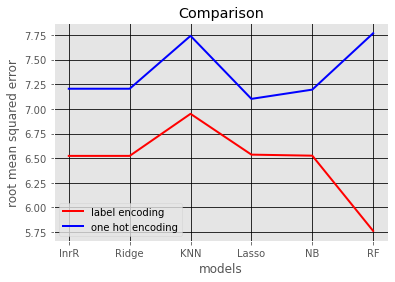

In [179]:
from matplotlib import style
style.use("ggplot")
plt.plot(["lnrR","Ridge","KNN","Lasso","NB","RF"],error_label, "r",label="label encoding",linewidth=2)
plt.plot(["lnrR","Ridge","KNN","Lasso","NB","RF"],error_one, "b",label="one hot encoding",linewidth=2)
plt.title("Comparison")
plt.xlabel("models")
plt.ylabel("root mean squared error")
plt.legend() 
plt.grid(True,color="k")
plt.show

In [176]:
error_label.shape

(6,)

In [175]:
error_one.shape


(6,)